In [15]:
import pandas as pd
import s3fs 
s3_path = 's3://data-processing1/Copy of Final_Training_Dataset.csv'
df = pd.read_csv(s3_path)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20982154 entries, 0 to 20982153
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   _id     object
 1   Dt      object
 2   Sta     int64 
 3   EqN     int64 
 4   Line    int64 
 5   Tag     int64 
 6   St      int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ GB
None


,_id,Dt,Sta,EqN,Line,Tag,St
0,63b9225c1f70e5b6d8636750,2020-01-01T00:00:35.000Z,207,1200350,7,7001,1
1,63b9225c1f70e5b6d8636751,2020-01-01T00:00:35.000Z,207,1200350,7,7001,0
2,63b9225c1f70e5b6d8636768,2020-01-01T00:00:37.000Z,207,282875,7,22005,0
3,63b9225c1f70e5b6d8636769,2020-01-01T00:00:39.000Z,207,282875,7,22005,0
4,63b9225c1f70e5b6d863676a,2020-01-01T00:00:53.000Z,207,282875,7,22005,1


In [16]:
# Basic statistical analysis
df.describe()


,Sta,EqN,Line,Tag,St
count,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07
mean,2.065264e+02,3.805496e+05,7.000007e+00,1.086814e+04,6.211572e-01
std,5.059593e-01,3.205597e+05,2.682637e-03,6.293936e+03,5.654182e+00
min,1.760000e+02,1.516730e+05,7.000000e+00,2.001000e+03,0.000000e+00
25%,2.060000e+02,2.827590e+05,7.000000e+00,5.043000e+03,0.000000e+00
50%,2.070000e+02,2.828480e+05,7.000000e+00,1.103600e+04,0.000000e+00
75%,2.070000e+02,2.828660e+05,7.000000e+00,1.103600e+04,0.000000e+00
max,2.070000e+02,1.200350e+06,8.000000e+00,3.100100e+04,9.800000e+01


In [17]:
# Check for missing values
df.isnull().sum()

# # Optionally, drop or fill missing values
# df = df.dropna()  # Drop rows with missing values
# # Alternatively, you can fill missing values with a method such as mean
# # df = df.fillna(df.mean())


_id     0
Dt      0
Sta     0
EqN     0
Line    0
Tag     0
St      0
dtype: int64

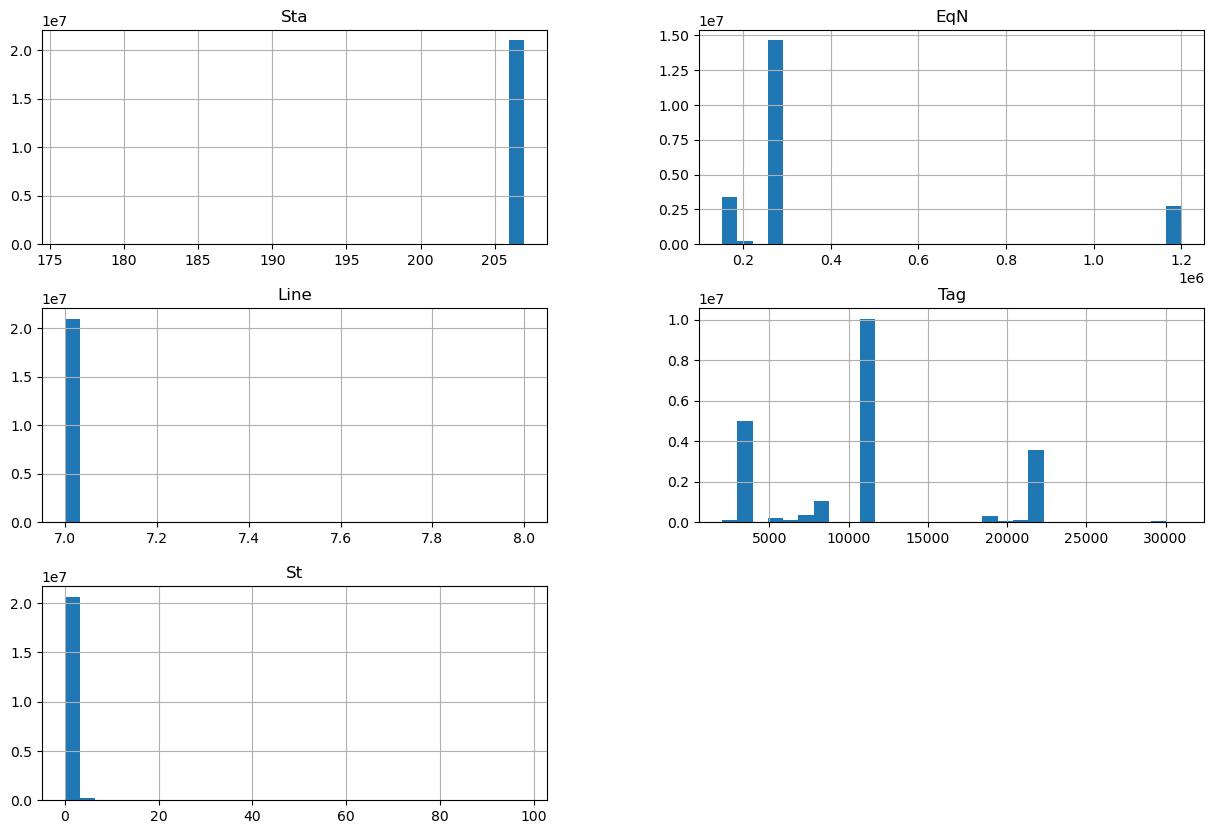

/tmp/ipykernel_7806/55446122.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


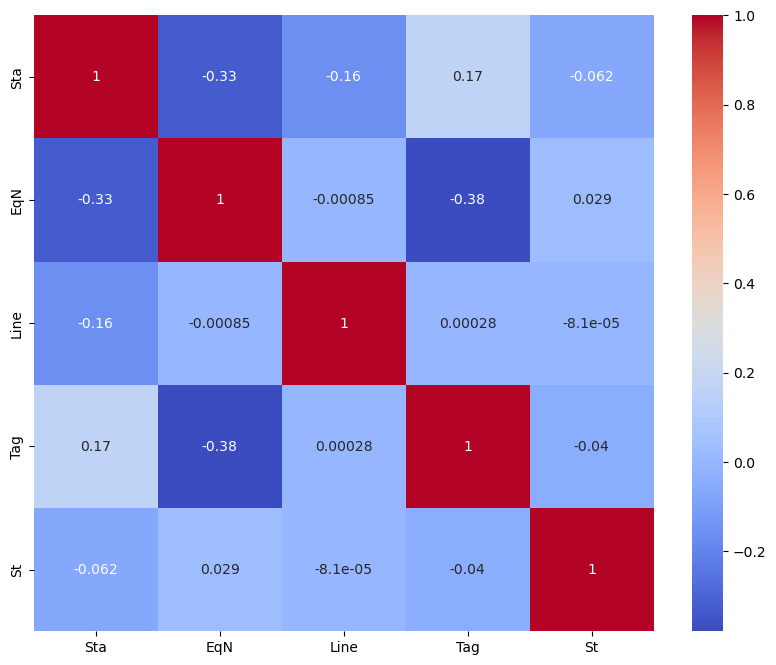

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each numeric feature
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [19]:

print(df.columns)

Index(['_id', 'Dt', 'Sta', 'EqN', 'Line', 'Tag', 'St'], dtype='object')


In [20]:
# Ensure 'Dt' is in datetime format with timezone handling
df['Dt'] = pd.to_datetime(df['Dt'], utc=True, errors='coerce')

# Now you can extract the desired components
df['hour'] = df['Dt'].dt.hour
df['day'] = df['Dt'].dt.day
df['month'] = df['Dt'].dt.month
df['year'] = df['Dt'].dt.year
df['day_of_week'] = df['Dt'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Grouping and analyzing traffic data
print(df.groupby('hour').size())  # Hourly traffic
print(df.groupby('day').size())   # Daily traffic
print(df.groupby('month').size()) # Monthly traffic


hour
0      638030
1      620744
2      728226
3      684949
4      589086
5      570340
6      581825
7      653294
8      782596
9      929979
10     924389
11     922671
12    1021521
13    1064929
14    1119760
15    1195445
16    1168360
17    1292375
18    1293951
19    1083687
20     902582
21     744830
22     724205
23     744380
dtype: int64
day
1      806702
2      811905
3      830025
4      748397
5      751428
6      785719
7      793232
8     1121790
9      830297
10     728160
11     733535
12     683035
13     667992
14     646105
15     617198
16     660531
17     642042
18     624104
19     629761
20     587080
21     617098
22     616145
23     635029
24     570182
25     577336
26     571782
27     648012
28     599074
29     559609
30     552737
31     336112
dtype: int64
month
1     2385297
2     1720373
3     1014718
4     1705557
5     2335973
6     2550214
7     2918777
8     1806552
9     1764535
10     900238
11     709315
12    1170605
dtype: int64


<Axes: xlabel='hour'>

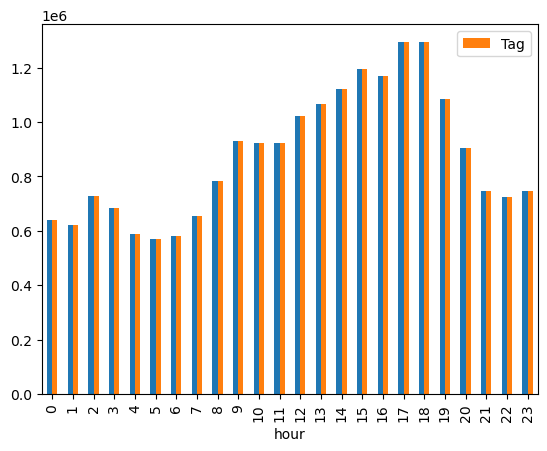

In [21]:
df.groupby('hour')[['_id', 'Tag']].count().plot(kind='bar')


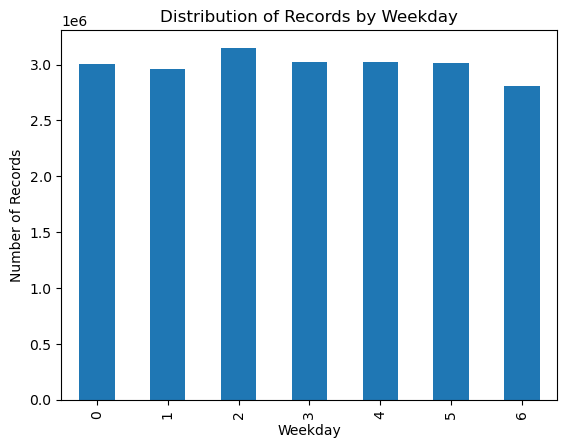

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and has a 'Dt' column
df['weekday'] = df['Dt'].dt.weekday  # Create the 'weekday' column

# Now you can group and plot
ax = df.groupby('weekday').size().plot(kind='bar')
ax.set_ylabel('Number of Records')
ax.set_xlabel('Weekday')
ax.set_title('Distribution of Records by Weekday')
plt.show()


<Axes: xlabel='Sta'>

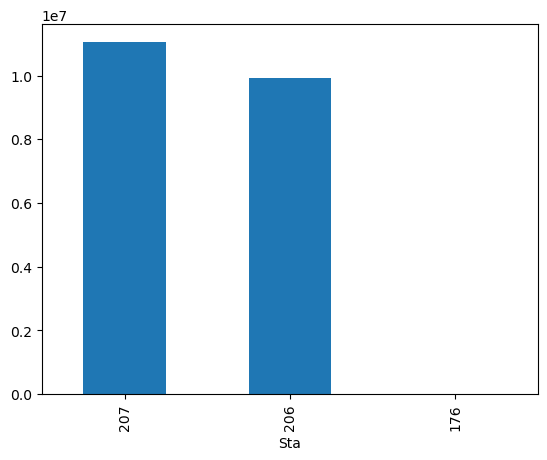

In [23]:
df.groupby('Sta')['_id'].count().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='EqN'>

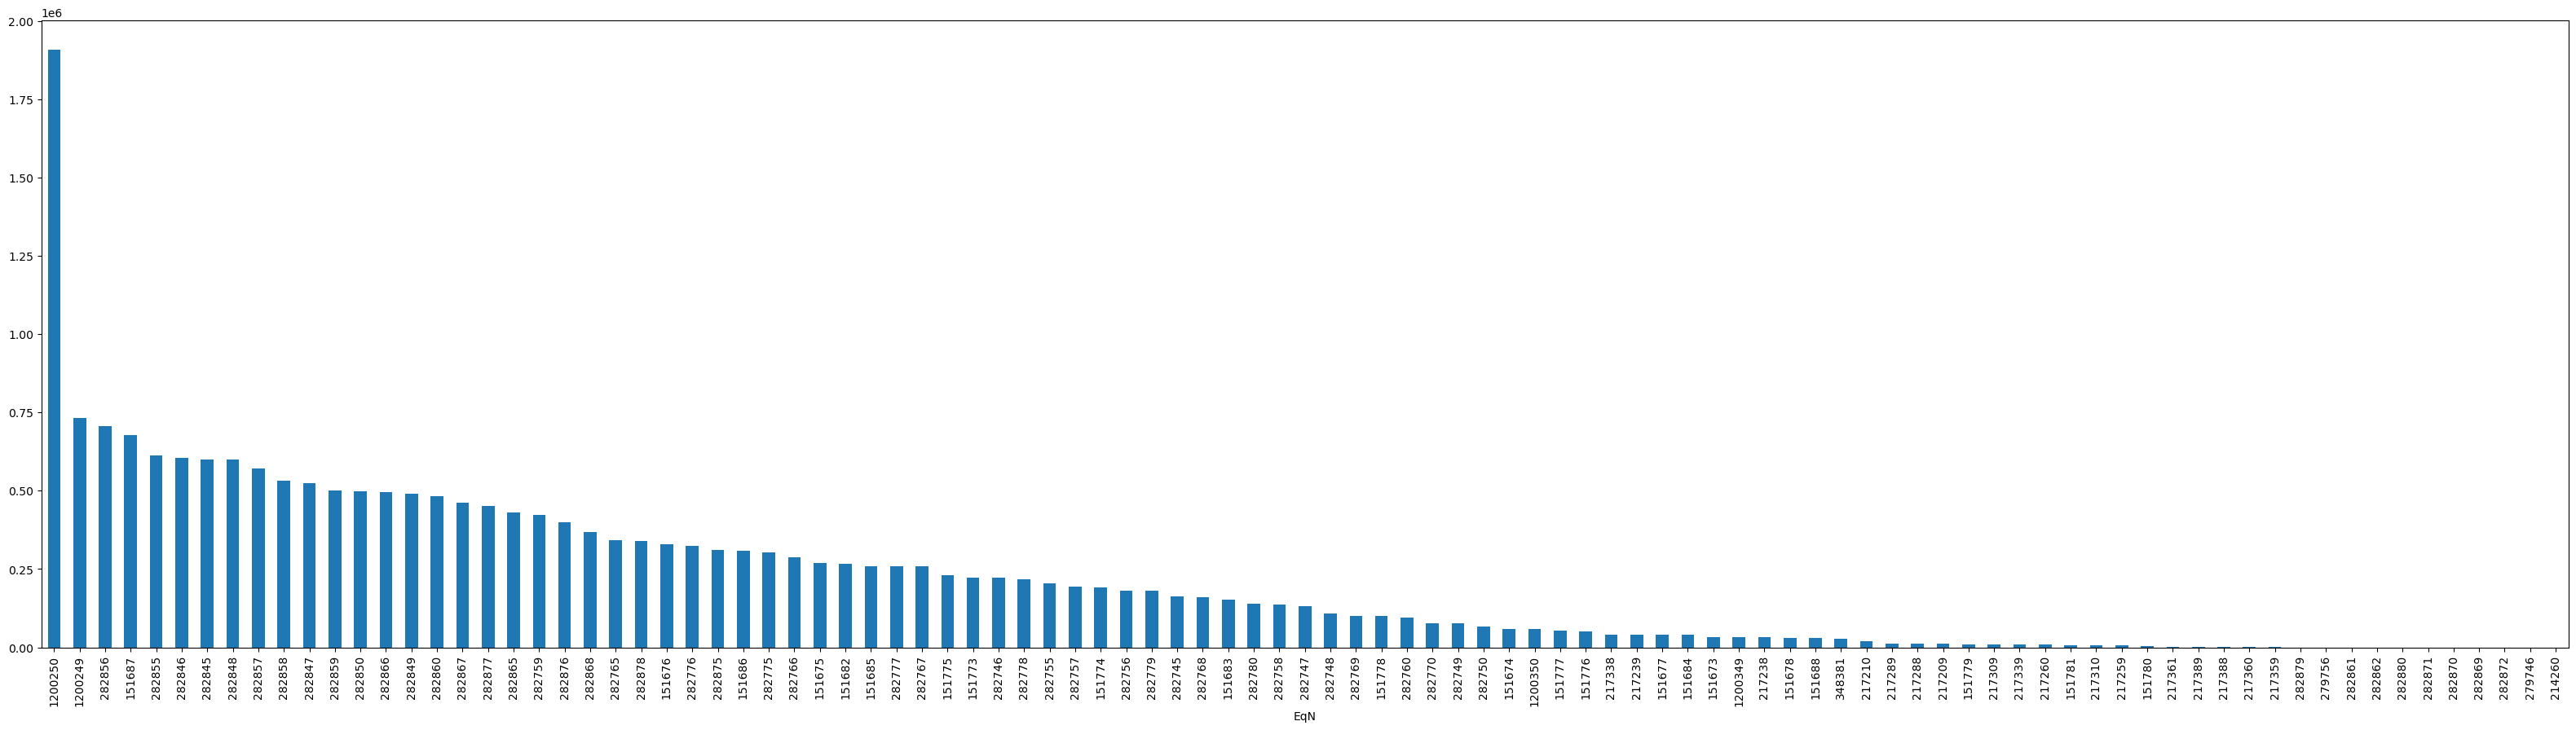

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
df.groupby('EqN')['_id'].count().sort_values(ascending=False).plot(kind='bar', rot=90)


In [25]:

print(df.columns)

Index(['_id', 'Dt', 'Sta', 'EqN', 'Line', 'Tag', 'St', 'hour', 'day', 'month',
       'year', 'day_of_week', 'is_weekend', 'weekday'],
      dtype='object')


In [26]:
df.pivot_table(index='Sta', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Sta,,,,,,,,,,,,,,,,,,,,,
176,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,23.0,NaN,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
206,265262.0,238709.0,317658.0,290199.0,220164.0,206801.0,221475.0,282177.0,391273.0,525827.0,...,529715.0,579080.0,547845.0,686366.0,710211.0,547272.0,405429.0,307787.0,291733.0,347675.0
207,372768.0,382028.0,410565.0,394750.0,368922.0,363539.0,360350.0,371117.0,391300.0,404152.0,...,590045.0,616365.0,620514.0,606005.0,583740.0,536415.0,497153.0,437043.0,432472.0,396705.0


In [27]:
df.pivot_table(index='EqN', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EqN,,,,,,,,,,,,,,,,,,,,,
151673,543.0,595.0,2380.0,4529.0,1973.0,625.0,682.0,608.0,964.0,851.0,...,1645.0,1314.0,1253.0,1108.0,1702.0,1999.0,2199.0,636.0,865.0,551.0
151674,544.0,1004.0,2528.0,4057.0,2045.0,1660.0,1583.0,1101.0,1678.0,1870.0,...,3433.0,2938.0,2858.0,3602.0,3299.0,2992.0,2989.0,2121.0,2018.0,1136.0
151675,609.0,1165.0,2486.0,3559.0,1566.0,3114.0,4102.0,5288.0,9791.0,10835.0,...,19853.0,20957.0,20030.0,23780.0,23258.0,15072.0,12992.0,5978.0,5861.0,3355.0
151676,1114.0,1683.0,2733.0,4176.0,1631.0,2533.0,3664.0,5078.0,11939.0,14746.0,...,22197.0,26183.0,27419.0,35542.0,32170.0,19088.0,14279.0,7368.0,7747.0,3691.0
151677,1387.0,1323.0,2673.0,4031.0,2033.0,1169.0,1857.0,1473.0,1675.0,1244.0,...,1922.0,1684.0,1745.0,1532.0,1629.0,1255.0,1412.0,1347.0,1813.0,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348381,632.0,448.0,841.0,2668.0,1025.0,766.0,410.0,337.0,496.0,458.0,...,1378.0,1493.0,1403.0,1419.0,1186.0,1456.0,1860.0,1276.0,2096.0,2323.0
1200249,31875.0,27978.0,26218.0,29363.0,25170.0,26626.0,29260.0,33212.0,33038.0,31315.0,...,26516.0,26434.0,28326.0,30363.0,32174.0,31078.0,35843.0,36270.0,33579.0,31363.0
1200250,79861.0,76304.0,75099.0,76431.0,74480.0,72852.0,74802.0,73894.0,73903.0,74773.0,...,83226.0,85959.0,87697.0,88009.0,87668.0,83723.0,80564.0,81358.0,80234.0,79639.0


In [28]:
df_filtered = df[df['Sta'] != 176]


In [29]:
df.pivot_table(index='EqN', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EqN,,,,,,,,,,,,,,,,,,,,,
151673,543.0,595.0,2380.0,4529.0,1973.0,625.0,682.0,608.0,964.0,851.0,...,1645.0,1314.0,1253.0,1108.0,1702.0,1999.0,2199.0,636.0,865.0,551.0
151674,544.0,1004.0,2528.0,4057.0,2045.0,1660.0,1583.0,1101.0,1678.0,1870.0,...,3433.0,2938.0,2858.0,3602.0,3299.0,2992.0,2989.0,2121.0,2018.0,1136.0
151675,609.0,1165.0,2486.0,3559.0,1566.0,3114.0,4102.0,5288.0,9791.0,10835.0,...,19853.0,20957.0,20030.0,23780.0,23258.0,15072.0,12992.0,5978.0,5861.0,3355.0
151676,1114.0,1683.0,2733.0,4176.0,1631.0,2533.0,3664.0,5078.0,11939.0,14746.0,...,22197.0,26183.0,27419.0,35542.0,32170.0,19088.0,14279.0,7368.0,7747.0,3691.0
151677,1387.0,1323.0,2673.0,4031.0,2033.0,1169.0,1857.0,1473.0,1675.0,1244.0,...,1922.0,1684.0,1745.0,1532.0,1629.0,1255.0,1412.0,1347.0,1813.0,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348381,632.0,448.0,841.0,2668.0,1025.0,766.0,410.0,337.0,496.0,458.0,...,1378.0,1493.0,1403.0,1419.0,1186.0,1456.0,1860.0,1276.0,2096.0,2323.0
1200249,31875.0,27978.0,26218.0,29363.0,25170.0,26626.0,29260.0,33212.0,33038.0,31315.0,...,26516.0,26434.0,28326.0,30363.0,32174.0,31078.0,35843.0,36270.0,33579.0,31363.0
1200250,79861.0,76304.0,75099.0,76431.0,74480.0,72852.0,74802.0,73894.0,73903.0,74773.0,...,83226.0,85959.0,87697.0,88009.0,87668.0,83723.0,80564.0,81358.0,80234.0,79639.0


In [30]:
# Count of NaN values in each column
print(df.isna().sum())


_id            0
Dt             0
Sta            0
EqN            0
Line           0
Tag            0
St             0
hour           0
day            0
month          0
year           0
day_of_week    0
is_weekend     0
weekday        0
dtype: int64


In [31]:
# Display rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)


Empty DataFrame
Columns: [_id, Dt, Sta, EqN, Line, Tag, St, hour, day, month, year, day_of_week, is_weekend, weekday]
Index: []


In [32]:
df.head()

,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2


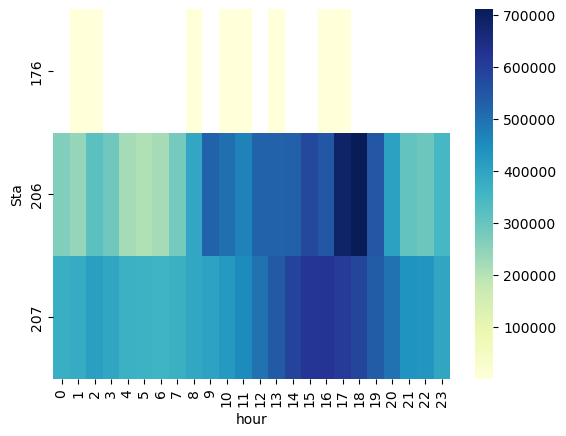

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Modify pivot table to include 'Tag'
heatmap_data = df.pivot_table(index=['Sta'], columns='hour', values='_id', aggfunc='count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu")

# Show the plot
plt.show()


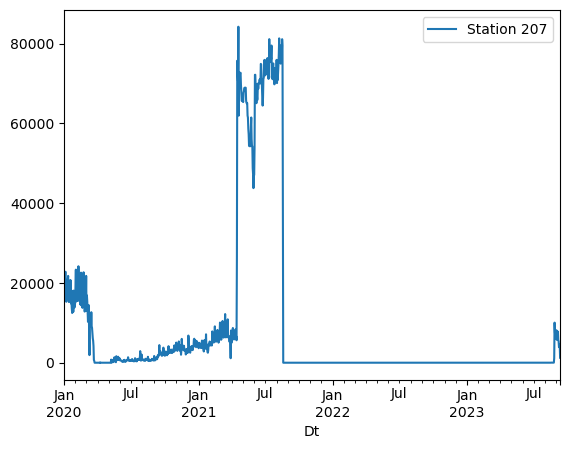

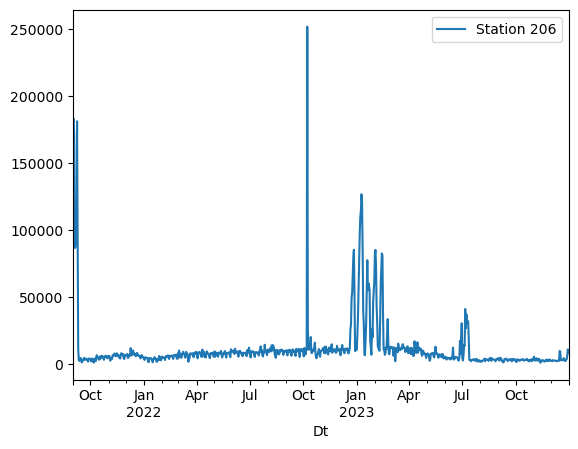

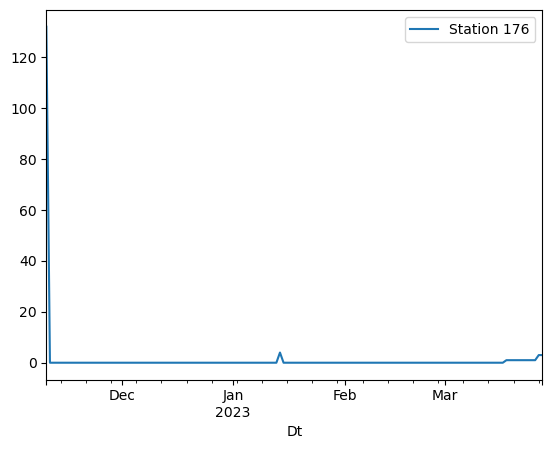

In [34]:
for station in df['Sta'].unique():
         df_station = df[df['Sta'] == station]
         df_station.set_index('Dt')['_id'].resample('D').count().plot(label=f'Station {station}')
         plt.legend()
         plt.show()


In [35]:
# Remove rows where the 'Sta' column has a value of 176
df_filtered = df[df['Sta'] != 176]

# Check the filtered DataFrame
print(df_filtered)


                               _id                        Dt  Sta      EqN  \
0         63b9225c1f70e5b6d8636750 2020-01-01 00:00:35+00:00  207  1200350   
1         63b9225c1f70e5b6d8636751 2020-01-01 00:00:35+00:00  207  1200350   
2         63b9225c1f70e5b6d8636768 2020-01-01 00:00:37+00:00  207   282875   
3         63b9225c1f70e5b6d8636769 2020-01-01 00:00:39+00:00  207   282875   
4         63b9225c1f70e5b6d863676a 2020-01-01 00:00:53+00:00  207   282875   
...                            ...                       ...  ...      ...   
20982149  6591c0b0a7fe43706789fb9c 2023-12-31 23:52:28+00:00  206   282776   
20982150  6591b35b1872153fcf86821f 2023-12-31 23:56:24+00:00  206   151682   
20982151  6591b35b1872153fcf868220 2023-12-31 23:56:24+00:00  206   151682   
20982152  6591b35b1872153fcf868221 2023-12-31 23:56:36+00:00  206   151682   
20982153  6591b35b1872153fcf868222 2023-12-31 23:56:36+00:00  206   151682   

          Line    Tag  St  hour  day  month  year  day_of_week 

MODEL TRAINING 

In [39]:
!pip install torch 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 766.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 122.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 41.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday,Hour
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00


In [45]:
import boto3

In [48]:
df.head()

,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday,Hour
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00


In [49]:
# Save the DataFrame to a CSV file
df.to_csv('Aggregated_Data.csv', index=False)

print("DataFrame saved as 'my_current_data.csv'")


DataFrame saved as 'my_current_data.csv'


In [50]:
df.head()

,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday,Hour
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
